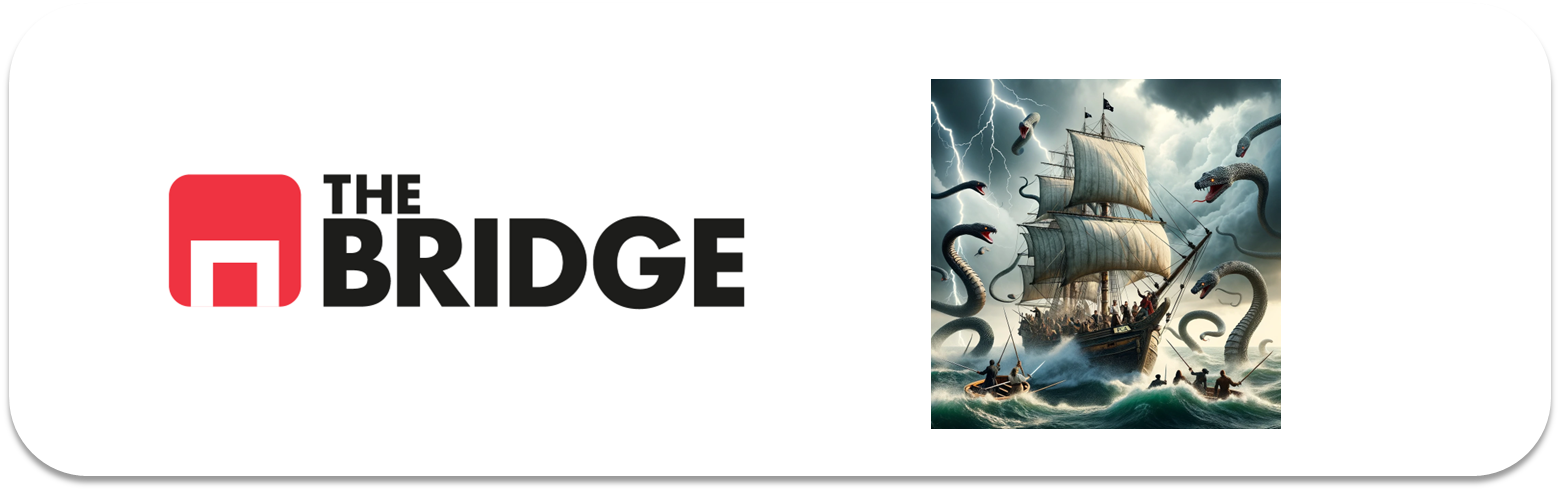

## PRACTICA OBLIGATORIA: **Seleccion Features**

### Descripción General y Objetivo

El objetivo es obtener una predicción de precio de ordenadores.

## 0 Preparación

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [2]:
# Herramientas
import bootcampviztools as bt
from toolbox_ML import *

# Visuales
import matplotlib.pyplot as plt
import seaborn as sns

#Básicos
import numpy as np
import pandas as pd

# Adecuación features
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Test
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

# Models
from sklearn.cluster import DBSCAN, KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Cambios de tamaño
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, MinMaxScaler


#import warnings library
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')

In [352]:
df = pd.read_csv("./data/train.csv")
df

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,268,1002,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36kg,749.00
1,347,867,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4GB,1TB HDD,Intel HD Graphics 505,Windows 10,2kg,449.00
2,353,966,Toshiba,Portege Z30-C-1CW,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.2kg,1460.00
3,578,767,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42kg,2868.99
4,42,1241,Dell,Latitude E7270,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.26kg,1713.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,89,973,Acer,Chromebook C738T-C2EJ,2 in 1 Convertible,11.6,IPS Panel Touchscreen 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25kg,389.00
908,716,1018,Toshiba,Portege Z30-C-16H,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.2kg,1195.00
909,517,1071,Acer,Aspire ES1-523,Notebook,15.6,1366x768,AMD A8-Series 7410 2.2GHz,8GB,1TB HDD,AMD Radeon R5,Windows 10,2.4kg,449.00
910,891,965,Dell,Latitude 7480,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.36kg,1775.00


In [353]:
    df_final_test = pd.read_csv("./data/test.csv")

In [175]:
# Mostrar proporciones de valores únicos para cada columna categórica
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"Proporciones en la columna '{column}':")
        print(df[column].value_counts(normalize=True))
        print("\n")

Proporciones en la columna 'Company':
Company
Lenovo       0.228070
Dell         0.226974
HP           0.207237
Asus         0.118421
Acer         0.082237
Toshiba      0.040570
MSI          0.037281
Apple        0.018640
Mediacom     0.007675
Razer        0.006579
Samsung      0.006579
Fujitsu      0.003289
Microsoft    0.003289
Vero         0.003289
Xiaomi       0.003289
Google       0.002193
Chuwi        0.002193
LG           0.001096
Huawei       0.001096
Name: proportion, dtype: float64


Proporciones en la columna 'Product':
Product
Inspiron 3567                                0.023026
XPS 13                                       0.021930
250 G6                                       0.020833
Vostro 3568                                  0.017544
Inspiron 5570                                0.012061
                                               ...   
Elitebook Folio                              0.001096
Q304UA-BHI5T11 (i5-7200U/6GB/1TB/FHD/W10)    0.001096
ThinkPad T470p         

In [6]:
# Función para mostrar proporciones de valores únicos para cada columna categórica
def mostrar_proporciones(df, top_n=10):
    for column in df.columns:
        if df[column].dtype == 'object':
            print(f"Proporciones en la columna '{column}':")
            value_counts = df[column].value_counts(normalize=True)
            if len(value_counts) > top_n:
                print(value_counts.head(top_n))
                print(f"\n... (and {len(value_counts) - top_n} more categories)")
            else:
                print(value_counts)
            print("\n")

# Llamar a la función
mostrar_proporciones(df)


Proporciones en la columna 'Company':
Company
Lenovo      0.228070
Dell        0.226974
HP          0.207237
Asus        0.118421
Acer        0.082237
Toshiba     0.040570
MSI         0.037281
Apple       0.018640
Mediacom    0.007675
Razer       0.006579
Name: proportion, dtype: float64

... (and 9 more categories)


Proporciones en la columna 'Product':
Product
Inspiron 3567         0.023026
XPS 13                0.021930
250 G6                0.020833
Vostro 3568           0.017544
Inspiron 5570         0.012061
Legion Y520-15IKBN    0.012061
ProBook 450           0.012061
Inspiron 5567         0.010965
Inspiron 7567         0.010965
Satellite Pro         0.010965
Name: proportion, dtype: float64

... (and 465 more categories)


Proporciones en la columna 'TypeName':
TypeName
Notebook              0.572368
Gaming                0.151316
Ultrabook             0.148026
2 in 1 Convertible    0.093202
Workstation           0.019737
Netbook               0.015351
Name: proportion, dtype:

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                912 non-null    int64  
 1   laptop_ID         912 non-null    int64  
 2   Company           912 non-null    object 
 3   Product           912 non-null    object 
 4   TypeName          912 non-null    object 
 5   Inches            912 non-null    float64
 6   ScreenResolution  912 non-null    object 
 7   Cpu               912 non-null    object 
 8   Ram               912 non-null    object 
 9   Memory            912 non-null    object 
 10  Gpu               912 non-null    object 
 11  OpSys             912 non-null    object 
 12  Weight            912 non-null    object 
 13  Price_euros       912 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 99.9+ KB


In [10]:
df.describe()

,id,laptop_ID,Inches,Price_euros
count,912.000000,912.000000,912.000000,912.000000
mean,645.091009,666.192982,15.011404,1108.122873
std,380.313813,384.873846,1.411744,714.597741
min,0.000000,1.000000,10.100000,174.000000
25%,319.750000,330.500000,14.000000,589.000000
50%,636.500000,673.500000,15.600000,949.000000
75%,980.250000,998.500000,15.600000,1458.500000
max,1302.000000,1320.000000,18.400000,6099.000000


### Detalles e Instrucciones

## 1. Revisión inicial

1. Target y distribución del nulos, revisar columna Screen Resolution para tratamiento y ver si alguna más. Aparte de hacer en numericas escalado y en categóricas one hot o dummmies.

In [354]:
target = "Price_euros"

In [355]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state= 42)

In [356]:
# Lista de columnas a eliminar
columns_to_drop = ['id', 'laptop_ID']

# Eliminar las columnas de cada DataFrame
train_set = train_set.drop(columns=columns_to_drop, errors='ignore')
test_set = test_set.drop(columns=columns_to_drop, errors='ignore')
df_test_final = df_final_test.drop(columns=columns_to_drop, errors='ignore')

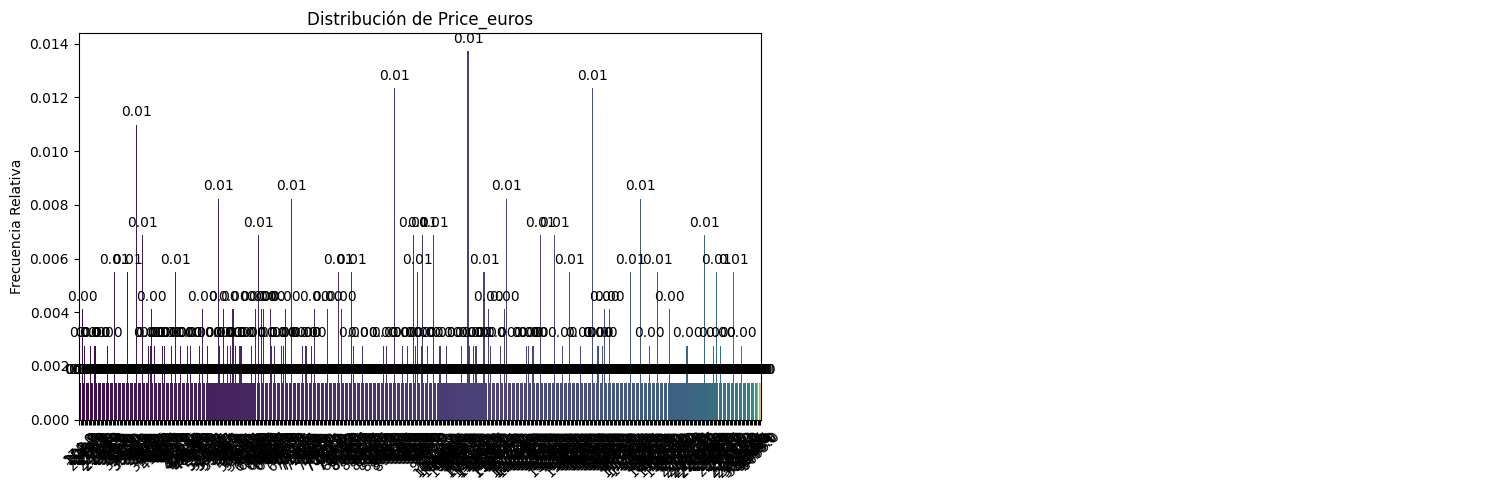

In [19]:
bt.pinta_distribucion_categoricas(train_set, [target], True, True)

In [357]:
# Calcular el precio promedio por cada categoría de Type Name
average_prices = train_set.groupby('Company')['Price_euros'].mean().reset_index()

# Renombrar las columnas para mayor claridad
average_prices.columns = ['Company', 'Average Price (Euros)']

# Ordenar por precio promedio de mayor a menor
average_prices = average_prices.sort_values(by='Average Price (Euros)', ascending=False)

# Mostrar los resultados
print(average_prices)


      Company  Average Price (Euros)
13      Razer            3745.000000
8          LG            2299.000000
10        MSI            1810.637778
6      Google            1559.000000
1       Apple            1556.470833
12  Microsoft            1398.950000
14    Samsung            1373.000000
15    Toshiba            1242.709677
4        Dell            1217.057278
2        Asus            1091.857640
9      Lenovo            1083.320976
17     Xiaomi            1067.000000
7          HP            1026.283557
5     Fujitsu             739.000000
0        Acer             646.722951
11   Mediacom             303.400000
3       Chuwi             246.945000
16       Vero             231.450000


In [358]:
train_set["Company"].value_counts(True)

Company
Dell         0.231824
Lenovo       0.224966
HP           0.204390
Asus         0.122085
Acer         0.083676
Toshiba      0.042524
MSI          0.037037
Apple        0.016461
Razer        0.006859
Mediacom     0.006859
Samsung      0.006859
Microsoft    0.004115
Vero         0.002743
Xiaomi       0.002743
Chuwi        0.002743
Fujitsu      0.001372
LG           0.001372
Google       0.001372
Name: proportion, dtype: float64

In [359]:
# Calcular el orden de las categorías basado en el valor medio de Price_euros para cada Company
type_name_order = train_set.groupby('Company')['Price_euros'].mean().sort_values(ascending=False).index.tolist()

# Convertir la columna 'Company' en una categoría ordenada y asignar etiquetas numéricas en cada DataFrame
for df in [train_set, test_set, df_final_test]:
    df['Company'] = pd.Categorical(df['Company'], categories=type_name_order, ordered=True)
    df['Company'] = df['Company'].cat.codes

In [360]:
train_set["Company"].value_counts(True)

Company
8     0.231824
10    0.224966
12    0.204390
9     0.122085
14    0.083676
7     0.042524
2     0.037037
4     0.016461
0     0.006859
15    0.006859
6     0.006859
5     0.004115
17    0.002743
11    0.002743
16    0.002743
13    0.001372
1     0.001372
3     0.001372
Name: proportion, dtype: float64

In [361]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, 25 to 102
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           729 non-null    int8   
 1   Product           729 non-null    object 
 2   TypeName          729 non-null    object 
 3   Inches            729 non-null    float64
 4   ScreenResolution  729 non-null    object 
 5   Cpu               729 non-null    object 
 6   Ram               729 non-null    object 
 7   Memory            729 non-null    object 
 8   Gpu               729 non-null    object 
 9   OpSys             729 non-null    object 
 10  Weight            729 non-null    object 
 11  Price_euros       729 non-null    float64
dtypes: float64(2), int8(1), object(9)
memory usage: 69.1+ KB


## 2. Transformación posibles features

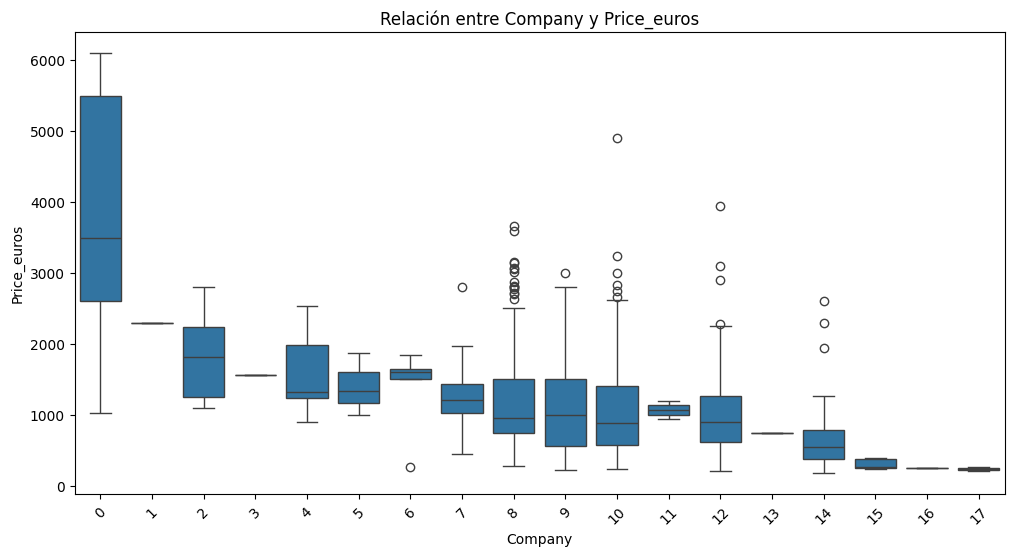

In [362]:
# Crear el gráfico de caja para mostrar la relación entre Type Name y Price_Euros
plt.figure(figsize=(12, 6))
sns.boxplot(x='Company', y='Price_euros', data=train_set)
plt.title('Relación entre Company y Price_euros')
plt.xticks(rotation=45)
plt.show()

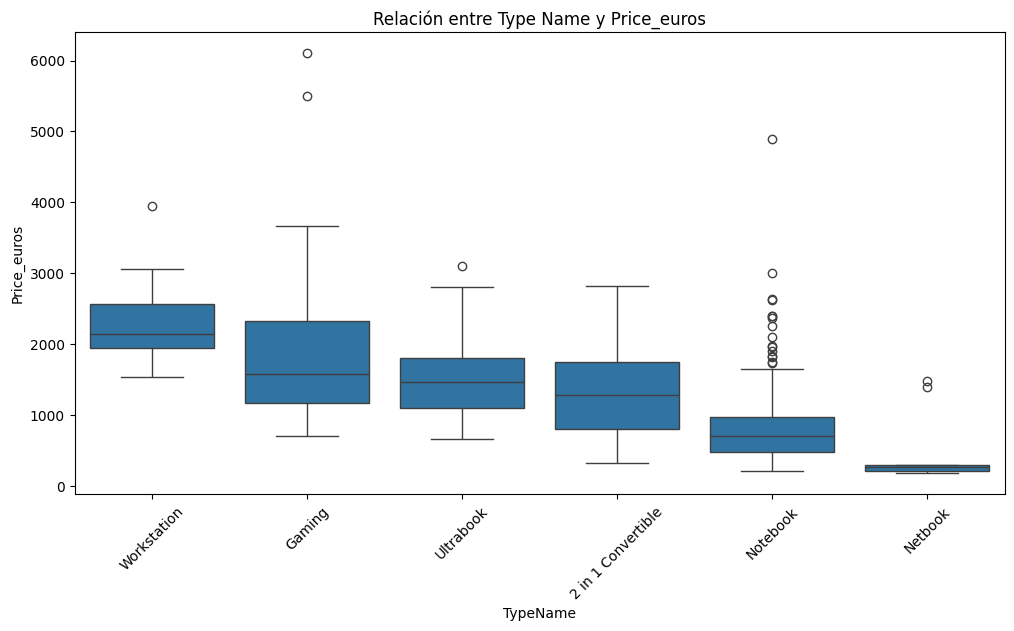

In [138]:
# Crear el gráfico de caja para mostrar la relación entre Type Name y Price_Euros
plt.figure(figsize=(12, 6))
sns.boxplot(x='TypeName', y='Price_euros', data=train_set)
plt.title('Relación entre Type Name y Price_euros')
plt.xticks(rotation=45)
plt.show()

Bastantes outliers en Notebook, por el momento revisamos para crear un one hot del tipo más caro al más barato

In [181]:
train_set["TypeName"].value_counts(True)

TypeName
Notebook              0.588477
Gaming                0.161866
Ultrabook             0.133059
2 in 1 Convertible    0.083676
Workstation           0.020576
Netbook               0.012346
Name: proportion, dtype: float64

In [363]:
# Calcular el precio promedio por cada categoría de Type Name
average_prices = train_set.groupby('TypeName')['Price_euros'].mean().reset_index()

# Renombrar las columnas para mayor claridad
average_prices.columns = ['TypeName', 'Average Price (Euros)']

# Ordenar por precio promedio de mayor a menor
average_prices = average_prices.sort_values(by='Average Price (Euros)', ascending=False)

# Mostrar los resultados
print(average_prices)


             TypeName  Average Price (Euros)
5         Workstation            2318.304000
1              Gaming            1832.246610
4           Ultrabook            1512.206186
0  2 in 1 Convertible            1291.593115
3            Notebook             785.442121
2             Netbook             507.111111


In [364]:
# Definir el orden de las categorías
type_name_order = [
    'Workstation',
    'Gaming',
    'Ultrabook',
    '2 in 1 Convertible',
    'Notebook',
    'Netbook'
]

# Convertir la columna 'TypeName' en una categoría ordenada y asignar etiquetas numéricas en cada DataFrame
for df in [train_set, test_set, df_final_test]:
    df['TypeName'] = pd.Categorical(df['TypeName'], categories=type_name_order, ordered=True)
    df['Type_NameCode'] = df['TypeName'].cat.codes

In [184]:
train_set.head(3)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Type_NameCode
25,Asus,X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux),Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,1TB HDD,Intel HD Graphics 620,Linux,2kg,389.0,4
84,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,256GB SSD,AMD Radeon R5,Windows 10,2.1kg,451.0,4
10,Asus,X540SA-RBPDN09 (N3710/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,4GB,1TB HDD,Intel HD Graphics 405,Windows 10,2.65kg,309.0,4


In [365]:
# Extraer el texto y el número
train_set['Screen_reso_texto'] = train_set['ScreenResolution'].str.extract(r'([A-Za-z\s]+)')
train_set['Screen_reso_num'] = train_set['ScreenResolution'].str.extract(r'(\d+x\d+)')
train_set.head(3)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Type_NameCode,Screen_reso_texto,Screen_reso_num
25,9,X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux),Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,1TB HDD,Intel HD Graphics 620,Linux,2kg,389.0,4,Full HD,1920x1080
84,14,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,256GB SSD,AMD Radeon R5,Windows 10,2.1kg,451.0,4,x,1366x768
10,9,X540SA-RBPDN09 (N3710/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,4GB,1TB HDD,Intel HD Graphics 405,Windows 10,2.65kg,309.0,4,x,1366x768


In [366]:
# Extraer alto y ancho
train_set[['ancho', 'alto']] = train_set['Screen_reso_num'].str.split('x', expand=True)

# Convertir las dimensiones a números enteros
train_set['ancho'] = train_set['ancho'].astype(int)
train_set['alto'] = train_set['alto'].astype(int)

# Calcular la multiplicación
train_set['reso_pixel'] = train_set['ancho'] * train_set['alto']

# Mostrar el DataFrame resultante
train_set.head(2)


,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Type_NameCode,Screen_reso_texto,Screen_reso_num,ancho,alto,reso_pixel
25,9,X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux),Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,1TB HDD,Intel HD Graphics 620,Linux,2kg,389.0,4,Full HD,1920x1080,1920,1080,2073600
84,14,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,256GB SSD,AMD Radeon R5,Windows 10,2.1kg,451.0,4,x,1366x768,1366,768,1049088


In [367]:

# Extraer el texto y el número
test_set['Screen_reso_texto'] = test_set['ScreenResolution'].str.extract(r'([A-Za-z\s]+)')
test_set['Screen_reso_num'] = test_set['ScreenResolution'].str.extract(r'(\d+x\d+)')

df_final_test['Screen_reso_texto'] = df_final_test['ScreenResolution'].str.extract(r'([A-Za-z\s]+)')
df_final_test['Screen_reso_num'] = df_final_test['ScreenResolution'].str.extract(r'(\d+x\d+)')

# Extraer alto y ancho
test_set[['ancho', 'alto']] = test_set['Screen_reso_num'].str.split('x', expand=True)
df_final_test[['ancho', 'alto']] = df_final_test['Screen_reso_num'].str.split('x', expand=True)

# Convertir las dimensiones a números enteros
test_set['ancho'] = test_set['ancho'].astype(int)
test_set['alto'] = test_set['alto'].astype(int)

df_final_test['ancho'] = df_final_test['ancho'].astype(int)
df_final_test['alto'] = df_final_test['alto'].astype(int)

# Calcular la multiplicación
test_set['reso_pixel'] = test_set['ancho'] * test_set['alto']
df_final_test['reso_pixel'] = df_final_test['ancho'] * df_final_test['alto']

Como se concentran en tres grupos se aplica codificacion

In [368]:
train_set["reso_pixel"].value_counts(True)

reso_pixel
2073600    0.643347
1049088    0.249657
8294400    0.041152
5760000    0.017833
1440000    0.010974
3686400    0.009602
2304000    0.006859
4096000    0.005487
3317760    0.004115
3393024    0.004115
5184000    0.002743
1296000    0.002743
3840000    0.001372
Name: proportion, dtype: float64

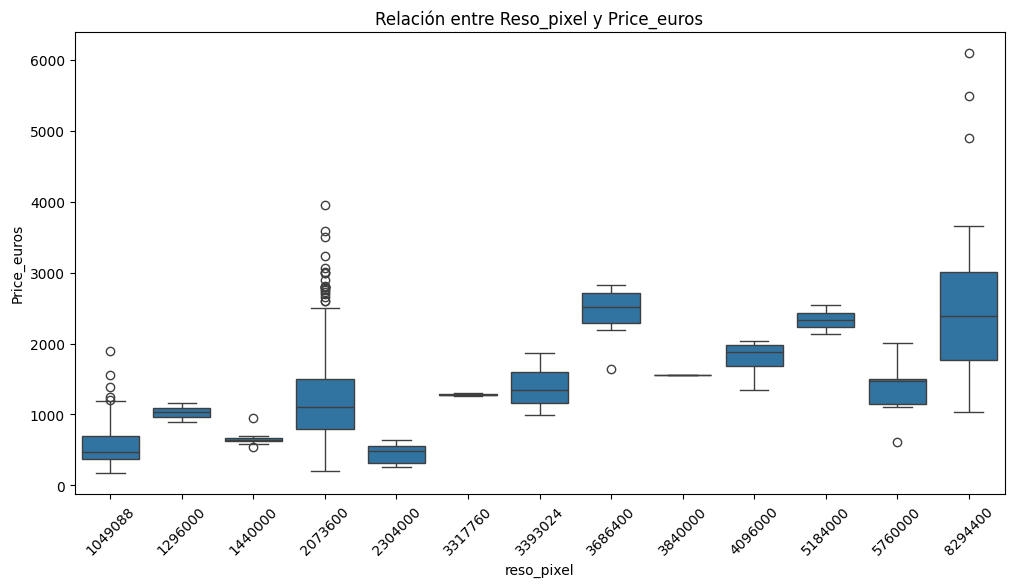

In [190]:
# Crear el gráfico de caja para mostrar la relación entre Type Name y Price_Euros
plt.figure(figsize=(12, 6))
sns.boxplot(x='reso_pixel', y='Price_euros', data=train_set)
plt.title('Relación entre Reso_pixel y Price_euros')
plt.xticks(rotation=45)
plt.show()

La regla no escrita dice que si tiene representación superior al 10% se dejaría. De momento dejamos todos.

In [370]:
# Define the thresholds for the categories based on given proportions
bins = [0, 1049088, 2073600,9073600]  # Adjusted thresholds to match the distribution
labels = [3, 2, 1]  # Three labels for three bins

# Assign the categories
train_set['pixel_code'] = pd.cut(train_set['reso_pixel'], bins=bins, labels=labels, right=True)
test_set['pixel_code'] = pd.cut(test_set['reso_pixel'], bins=bins, labels=labels, right=True)
df_final_test['pixel_code'] = pd.cut(df_final_test['reso_pixel'], bins=bins, labels=labels, right=True)

In [105]:
train_set.head(6)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Type NameCode,Screen_reso_texto,Screen_reso_num,ancho,alto,reso_pixel,pixel_code,pixel_codse
25,Asus,X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux),Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,1TB HDD,Intel HD Graphics 620,Linux,2kg,389.0,4,Full HD,1920x1080,1920,1080,2073600,2,NaN
84,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,256GB SSD,AMD Radeon R5,Windows 10,2.1kg,451.0,4,x,1366x768,1366,768,1049088,3,NaN
10,Asus,X540SA-RBPDN09 (N3710/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,4GB,1TB HDD,Intel HD Graphics 405,Windows 10,2.65kg,309.0,4,x,1366x768,1366,768,1049088,3,NaN
342,Dell,Inspiron 3576,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,1TB HDD,AMD Radeon 520,Linux,2.2kg,647.0,4,Full HD,1920x1080,1920,1080,2073600,2,NaN
890,HP,14-am079na (N3710/8GB/2TB/W10),Notebook,14.0,1366x768,Intel Pentium Quad Core N3710 1.6GHz,8GB,2TB HDD,Intel HD Graphics 405,Windows 10,1.94kg,389.0,4,x,1366x768,1366,768,1049088,3,NaN
396,Toshiba,Portege X30-D-10X,Notebook,13.3,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 620,Windows 10,1.05kg,1285.0,4,Full HD,1920x1080,1920,1080,2073600,2,NaN


In [371]:
train_set["pixel_code"].value_counts(True)

pixel_code
2    0.657064
3    0.249657
1    0.093278
Name: proportion, dtype: float64

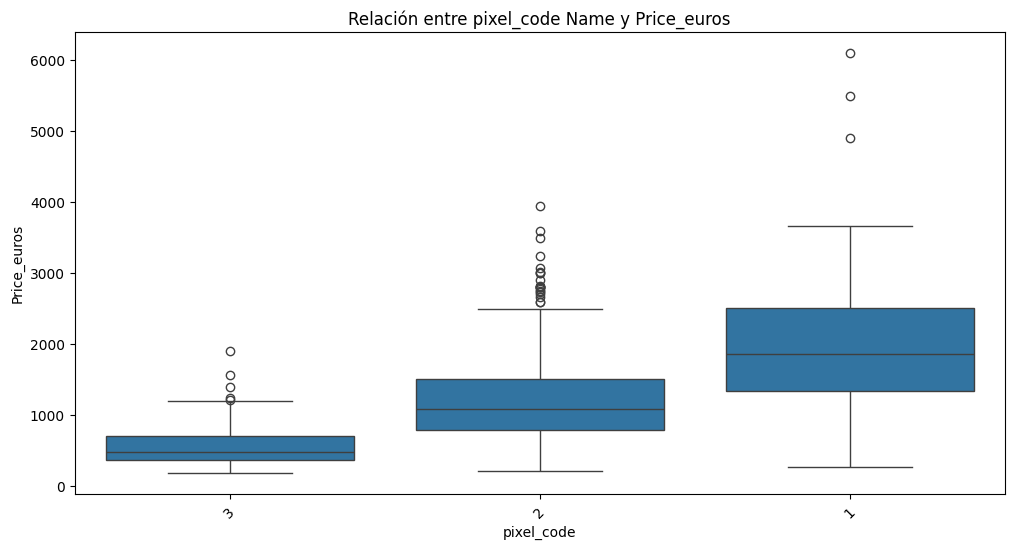

In [140]:
# Crear el gráfico de caja para mostrar la relación entre Type Name y Price_Euros
plt.figure(figsize=(12, 6))
sns.boxplot(x='pixel_code', y='Price_euros', data=train_set)
plt.title('Relación entre pixel_code Name y Price_euros')
plt.xticks(rotation=45)
plt.show()

In [372]:
# Convertir la columna 'pixel_code' a numérica
train_set['pixel_code'] = train_set['pixel_code'].astype(int)
test_set['pixel_code'] = test_set['pixel_code'].astype(int)
df_final_test['pixel_code'] = df_final_test['pixel_code'].astype(int)

In [373]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, 25 to 102
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Company            729 non-null    int8    
 1   Product            729 non-null    object  
 2   TypeName           729 non-null    category
 3   Inches             729 non-null    float64 
 4   ScreenResolution   729 non-null    object  
 5   Cpu                729 non-null    object  
 6   Ram                729 non-null    object  
 7   Memory             729 non-null    object  
 8   Gpu                729 non-null    object  
 9   OpSys              729 non-null    object  
 10  Weight             729 non-null    object  
 11  Price_euros        729 non-null    float64 
 12  Type_NameCode      729 non-null    int8    
 13  Screen_reso_texto  729 non-null    object  
 14  Screen_reso_num    729 non-null    object  
 15  ancho              729 non-null    int32   
 16  alto        

In [343]:
col_cat

['OpSys', 'pixel_code', 'code_marca_gpu', 'Cpu_Brand', 'Cpu_Model']

In [374]:
train_set["Gpu"].value_counts(True)

Gpu
Intel HD Graphics 620             0.223594
Intel HD Graphics 520             0.148148
Intel UHD Graphics 620            0.053498
Nvidia GeForce GTX 1050           0.052126
Nvidia GeForce GTX 1060           0.034294
                                    ...   
Nvidia Quadro M2200M              0.001372
Nvidia GeForce GTX 960<U+039C>    0.001372
Nvidia GeForce 960M               0.001372
AMD FirePro W6150M                0.001372
AMD Radeon R5 M315                0.001372
Name: proportion, Length: 82, dtype: float64

Parece que hay varias marcas, seguramente influye también la potencia pero vamos a crear la columna code_marca_gpu para el análisis.

In [375]:
# Calcular el precio promedio por cada categoría de Type Name
average_prices = train_set.groupby('Gpu')['Price_euros'].mean().reset_index()

# Renombrar las columnas para mayor claridad
average_prices.columns = ['Gpu', 'Average Price (Euros)']

# Ordenar por precio promedio de mayor a menor
average_prices = average_prices.sort_values(by='Average Price (Euros)', ascending=False)

# Mostrar los resultados
print(average_prices)

                         Gpu  Average Price (Euros)
77      Nvidia Quadro M2200M            4899.000000
61   Nvidia GeForce GTX 1080            4349.000000
78      Nvidia Quadro M3000M            3949.400000
60  Nvidia GeForce GTX 1070M            3588.800000
81       Nvidia Quadro M620M            2999.000000
..                       ...                    ...
8     AMD Radeon R2 Graphics             349.000000
10    AMD Radeon R4 Graphics             339.000000
28     Intel HD Graphics 400             326.608500
30     Intel HD Graphics 500             319.206471
7              AMD Radeon R2             277.990000

[82 rows x 2 columns]


In [376]:
# Crear el mapeo de marcas a números
marca_to_code = {
    'Nvidia': 1,
    'AMD': 2,
    'Intel': 3,
    'Otras': 4
}

# Función para asignar el código de marca de GPU
def assign_gpu_code(df):
    df['code_marca_gpu'] = 'Otras'  # Inicializar con 'Otras'
    df.loc[df['Gpu'].str.contains('Nvidia', case=False, na=False), 'code_marca_gpu'] = 'Nvidia'
    df.loc[df['Gpu'].str.contains('AMD', case=False, na=False), 'code_marca_gpu'] = 'AMD'
    df.loc[df['Gpu'].str.contains('Intel', case=False, na=False), 'code_marca_gpu'] = 'Intel'
    df['code_marca_gpu'] = df['code_marca_gpu'].map(marca_to_code).astype(int)

# Aplicar la función a train_set
assign_gpu_code(train_set)

# Aplicar la función a test_set
assign_gpu_code(test_set)

# Aplicar la función a df_final_test
assign_gpu_code(df_final_test)


In [349]:
train_set["code_marca_gpu"].value_counts(True)


code_marca_gpu
Intel     0.563786
Nvidia    0.303155
AMD       0.133059
Name: proportion, dtype: float64

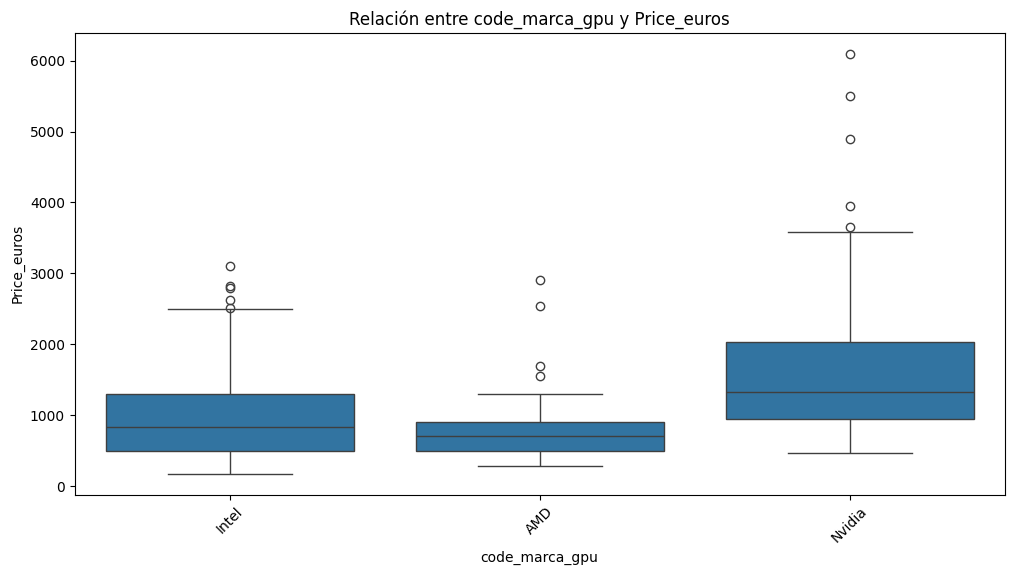

In [141]:
# Crear el gráfico de caja para mostrar la relación entre Type Name y Price_Euros
plt.figure(figsize=(12, 6))
sns.boxplot(x='code_marca_gpu', y='Price_euros', data=train_set)
plt.title('Relación entre code_marca_gpu y Price_euros')
plt.xticks(rotation=45)
plt.show()

Peso hay que convertirlo en numerico

In [378]:
train_set["Weight"].value_counts(True)             

Weight
2.2kg     0.098765
2.1kg     0.043896
2.3kg     0.039781
2kg       0.035665
2.5kg     0.028807
            ...   
2.83kg    0.001372
1.87kg    0.001372
2.79kg    0.001372
3.8kg     0.001372
1.24kg    0.001372
Name: proportion, Length: 149, dtype: float64

In [379]:
# Función para convertir el peso a numérico
def convert_weight_to_numeric(weight_series):
    return weight_series.str.replace('kg', '').astype(float)

# Aplicar la función a train_set
train_set['Weight'] = convert_weight_to_numeric(train_set['Weight'])

# Aplicar la función a test_set
test_set['Weight'] = convert_weight_to_numeric(test_set['Weight'])

# Aplicar la función a df_final_test
df_final_test['Weight'] = convert_weight_to_numeric(df_final_test['Weight'])

In [380]:
train_set["Weight"].value_counts(True)             

Weight
2.20    0.101509
2.00    0.043896
2.10    0.043896
2.30    0.039781
2.50    0.028807
          ...   
2.83    0.001372
1.87    0.001372
2.79    0.001372
3.80    0.001372
1.24    0.001372
Name: proportion, Length: 143, dtype: float64

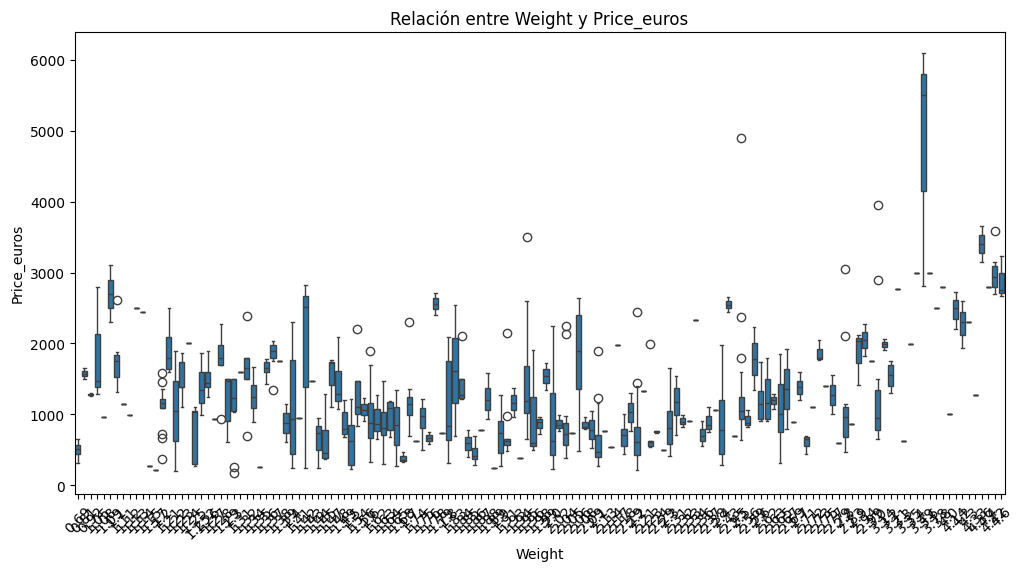

In [142]:
# Crear el gráfico de caja para mostrar la relación entre Type Name y Price_Euros
plt.figure(figsize=(12, 6))
sns.boxplot(x='Weight', y='Price_euros', data=train_set)
plt.title('Relación entre Weight y Price_euros')
plt.xticks(rotation=45)
plt.show()

In [381]:
# Calcular el precio promedio por cada categoría de Type Name
average_prices = train_set.groupby('Weight')['Price_euros'].mean().reset_index()

# Renombrar las columnas para mayor claridad
average_prices.columns = ['Weight', 'Average Price (Euros)']

# Ordenar por precio promedio de mayor a menor
average_prices = average_prices.sort_values(by='Average Price (Euros)', ascending=False)

# Mostrar los resultados
print(average_prices)


     Weight  Average Price (Euros)
130    3.49            4803.916667
139    4.36            3406.700000
129    3.40            2999.000000
131    3.60            2999.000000
141    4.42            2998.602500
..      ...                    ...
50     1.68             382.666667
11     1.15             269.000000
28     1.35             255.000000
64     1.89             246.945000
12     1.17             209.000000

[143 rows x 2 columns]


In [143]:
train_set["Ram"].value_counts(True)


Ram
8GB     0.470508
4GB     0.299040
16GB    0.141289
6GB     0.037037
32GB    0.019204
12GB    0.017833
2GB     0.012346
24GB    0.002743
Name: proportion, dtype: float64

In [382]:
# Función para convertir el peso a numérico
def convert_ram_to_numeric(Ram_Series):
    return Ram_Series.str.replace('GB', '').astype(float)

# Aplicar la función a train_set
train_set['Ram'] = convert_ram_to_numeric(train_set['Ram'])

# Aplicar la función a test_set
test_set['Ram'] = convert_ram_to_numeric(test_set['Ram'])

# Aplicar la función a df_final_test
df_final_test['Ram'] = convert_ram_to_numeric(df_final_test['Ram'])

In [383]:
train_set["Ram"].value_counts(True)

Ram
8.0     0.470508
4.0     0.299040
16.0    0.141289
6.0     0.037037
32.0    0.019204
12.0    0.017833
2.0     0.012346
24.0    0.002743
Name: proportion, dtype: float64

En memory se simplifica extrayendo el numero de GB 

In [ ]:
train_set["Memory"].value_counts(True)

Memory
256GB SSD                        0.315501
1TB HDD                          0.161866
500GB HDD                        0.101509
512GB SSD                        0.080933
128GB SSD +  1TB HDD             0.072702
128GB SSD                        0.064472
256GB SSD +  1TB HDD             0.058985
32GB Flash Storage               0.026063
2TB HDD                          0.015089
64GB Flash Storage               0.013717
512GB SSD +  1TB HDD             0.013717
1.0TB Hybrid                     0.009602
1TB SSD                          0.009602
180GB SSD                        0.006859
256GB Flash Storage              0.005487
16GB Flash Storage               0.005487
32GB SSD                         0.004115
256GB SSD +  2TB HDD             0.004115
1TB SSD +  1TB HDD               0.002743
16GB SSD                         0.002743
256GB SSD +  500GB HDD           0.002743
128GB Flash Storage              0.002743
512GB SSD +  512GB SSD           0.001372
8GB SSD                    

In [384]:
import re

# Función para extraer y convertir el valor numérico de la capacidad de almacenamiento a GB
def convert_storage_to_gb(storage_series):
    # Convertir valores de TB a GB
    storage_series = storage_series.str.replace(r'(\d+(?:\.\d+)?)\s*TB', lambda x: str(float(x.group(1)) * 1024) + 'GB', regex=True)
    # Extraer el valor numérico en GB
    return storage_series.str.extract(r'(\d+(?:\.\d+)?)\s*GB', expand=False).astype(float)


# Aplicar la función a train_set
train_set['Memoria_GB'] = convert_storage_to_gb(train_set['Memory'])

# Aplicar la función a test_set
test_set['Memoria_GB'] = convert_storage_to_gb(test_set['Memory'])

# Aplicar la función a df_final_test
df_final_test['Memoria_GB'] = convert_storage_to_gb(df_final_test['Memory'])

In [385]:
train_set["Memoria_GB"].value_counts(True)

Memoria_GB
256.0     0.389575
1024.0    0.186557
128.0     0.141289
500.0     0.101509
512.0     0.100137
32.0      0.031550
64.0      0.016461
2048.0    0.015089
16.0      0.008230
180.0     0.006859
240.0     0.001372
8.0       0.001372
Name: proportion, dtype: float64

In [206]:
train_set_menor_8 = train_set[train_set['Memoria_GB'] < 8]
train_set_menor_8

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,Price_euros,Type_NameCode,Screen_reso_texto,Screen_reso_num,ancho,alto,reso_pixel,pixel_code,code_marca_gpu,Memoria_GB


Opsys dudo de si tratarlo, de momento se mantiene como está.

In [386]:
train_set.head(2)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,Price_euros,Type_NameCode,Screen_reso_texto,Screen_reso_num,ancho,alto,reso_pixel,pixel_code,code_marca_gpu,Memoria_GB
25,9,X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux),Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4.0,1TB HDD,Intel HD Graphics 620,Linux,...,389.0,4,Full HD,1920x1080,1920,1080,2073600,2,3,1024.0
84,14,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4.0,256GB SSD,AMD Radeon R5,Windows 10,...,451.0,4,x,1366x768,1366,768,1049088,3,2,256.0


In [207]:
train_set["OpSys"].value_counts(True)                           

OpSys
Windows 10      0.820302
Linux           0.056241
No OS           0.043896
Windows 7       0.032922
Chrome OS       0.021948
macOS           0.010974
Mac OS X        0.005487
Windows 10 S    0.005487
Android         0.002743
Name: proportion, dtype: float64

In [388]:
# Calcular el precio promedio por cada categoría de Type Name
average_prices = train_set.groupby('OpSys')['Price_euros'].mean().reset_index()

# Renombrar las columnas para mayor claridad
average_prices.columns = ['OpSys', 'Average Price (Euros)']

# Ordenar por precio promedio de mayor a menor
average_prices = average_prices.sort_values(by='Average Price (Euros)', ascending=False)

# Mostrar los resultados
print(average_prices)

          OpSys  Average Price (Euros)
7     Windows 7            1652.234583
8         macOS            1624.960000
3      Mac OS X            1419.492500
5    Windows 10            1176.914365
6  Windows 10 S            1118.710000
2         Linux             621.780488
4         No OS             530.584375
1     Chrome OS             501.806250
0       Android             434.000000


In [389]:
# Crear el mapeo de sistemas operativos a números
opsys_to_code = {
    'Windows 7': 1,
    'macOS': 2,
    'Mac OS X': 3,
    'Windows 10': 4,
    'Windows 10 S': 5,
    'Linux': 6,
    'No OS': 7,
    'Chrome OS': 8,
    'Android': 9,
    'Otras': 10  # Incluimos una categoría 'Otras' para aquellos no listados explícitamente
}
# Función para asignar el código de sistema operativo
def assign_sys_code(df):
    df['code_opsys'] = df['OpSys'].map(opsys_to_code).fillna(10).astype(int)  # Asignar 10 para valores no mapeados

# Aplicar la función a train_set
assign_sys_code(train_set)

# Aplicar la función a test_set
assign_sys_code(test_set)

# Aplicar la función a df_final_test
assign_sys_code(df_final_test)

In [391]:
train_set["code_opsys"].value_counts(True)             

code_opsys
4    0.820302
6    0.056241
7    0.043896
1    0.032922
8    0.021948
2    0.010974
3    0.005487
5    0.005487
9    0.002743
Name: proportion, dtype: float64

In [164]:
train_set["Cpu"].value_counts(True)

Cpu
Intel Core i5 7200U 2.5GHz      0.157750
Intel Core i7 7700HQ 2.8GHz     0.126200
Intel Core i7 7500U 2.7GHz      0.096022
Intel Core i5 8250U 1.6GHz      0.060357
Intel Core i5 6200U 2.3GHz      0.057613
                                  ...   
AMD A6-Series A6-9220 2.5GHz    0.001372
AMD A12-Series 9720P 2.7GHz     0.001372
Intel Core i5 2.3GHz            0.001372
AMD Ryzen 1600 3.2GHz           0.001372
AMD A10-Series 9620P 2.5GHz     0.001372
Name: proportion, Length: 92, dtype: float64

In [392]:
from sklearn.preprocessing import LabelEncoder
# Función para extraer la marca de CPU
def extract_cpu_brand(cpu_series):
    return cpu_series.str.extract(r'(\b(?:Intel|AMD|Samsung|Mediatek|Apple)\b)', expand=False)

# Función para extraer el modelo de CPU
def extract_cpu_model(cpu_series):
    return cpu_series.str.extract(r'\b(?:Intel|AMD)\s+([^\d]+)\s*\d', expand=False)
    
# Función para extraer la frecuencia de CPU
def extract_cpu_frequency(cpu_series):
    return cpu_series.str.extract(r'(\d+\.\d+|\d+)GHz', expand=False).astype(float)

# Aplicar las funciones a los DataFrames
def process_cpu_columns(df):
    df['Cpu_Brand'] = extract_cpu_brand(df['Cpu'])
    df['Cpu_Model'] = extract_cpu_model(df['Cpu'])
    df['Cpu_Frequency'] = extract_cpu_frequency(df['Cpu'])
    return df

# Aplicar las funciones a los DataFrames
train_set = process_cpu_columns(train_set)
test_set = process_cpu_columns(test_set)
df_final_test = process_cpu_columns(df_final_test)

# Convertir 'Cpu_Brand' y 'Cpu_Model' a valores numéricos utilizando LabelEncoder
def encode_labels(df, column):
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    return df

# Aplicar LabelEncoder a 'Cpu_Brand' y 'Cpu_Model'
train_set = encode_labels(train_set, 'Cpu_Brand')
train_set = encode_labels(train_set, 'Cpu_Model')

test_set = encode_labels(test_set, 'Cpu_Brand')
test_set = encode_labels(test_set, 'Cpu_Model')

df_final_test = encode_labels(df_final_test, 'Cpu_Brand')
df_final_test = encode_labels(df_final_test, 'Cpu_Model')

In [209]:
train_set["Cpu_Brand"].value_counts(True)

Cpu_Brand
Intel    0.951989
AMD      0.048011
Name: proportion, dtype: float64

In [393]:
train_set["Cpu_Model"].value_counts(True)

Cpu_Model
9     0.835391
4     0.048011
0     0.037037
15    0.023320
2     0.010974
6     0.006859
3     0.006859
5     0.005487
17    0.004115
16    0.004115
13    0.002743
10    0.002743
12    0.002743
7     0.002743
8     0.002743
11    0.001372
1     0.001372
14    0.001372
Name: proportion, dtype: float64

In [394]:
train_set["Cpu_Frequency"].value_counts(True)

Cpu_Frequency
2.50    0.223594
2.80    0.137174
2.70    0.119342
1.60    0.106996
2.30    0.071331
2.00    0.061728
1.80    0.054870
2.60    0.049383
2.40    0.043896
1.10    0.035665
2.90    0.019204
3.00    0.016461
1.44    0.010974
1.20    0.008230
2.20    0.008230
1.50    0.006859
3.60    0.005487
3.10    0.004115
2.10    0.004115
1.30    0.004115
0.90    0.002743
1.92    0.001372
1.00    0.001372
3.20    0.001372
1.90    0.001372
Name: proportion, dtype: float64

In [395]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, 25 to 102
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Company            729 non-null    int8    
 1   Product            729 non-null    object  
 2   TypeName           729 non-null    category
 3   Inches             729 non-null    float64 
 4   ScreenResolution   729 non-null    object  
 5   Cpu                729 non-null    object  
 6   Ram                729 non-null    float64 
 7   Memory             729 non-null    object  
 8   Gpu                729 non-null    object  
 9   OpSys              729 non-null    object  
 10  Weight             729 non-null    float64 
 11  Price_euros        729 non-null    float64 
 12  Type_NameCode      729 non-null    int8    
 13  Screen_reso_texto  729 non-null    object  
 14  Screen_reso_num    729 non-null    object  
 15  ancho              729 non-null    int32   
 16  alto        

In [396]:
# Definir las columnas que deseas eliminar
cols_drop = ['TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'Screen_reso_texto', 'Screen_reso_num', 'ancho', 'alto', 'reso_pixel','Product','OpSys']

# Eliminar las columnas de train_set
train_set = train_set.drop(columns=cols_drop, errors='ignore')

# Eliminar las columnas de test_set
test_set = test_set.drop(columns=cols_drop, errors='ignore')

# Eliminar las columnas de df_final_test
df_final_test = df_final_test.drop(columns=cols_drop, errors='ignore')

In [444]:
# Definir las columnas que deseas eliminar
cols_drop = ['OpSys']

# Eliminar las columnas de train_set
train_set = train_set.drop(columns=cols_drop, errors='ignore')

# Eliminar las columnas de test_set
test_set = test_set.drop(columns=cols_drop, errors='ignore')

# Eliminar las columnas de df_final_test
df_final_test = df_final_test.drop(columns=cols_drop, errors='ignore')


In [445]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, 25 to 102
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         729 non-null    int8   
 1   Inches          729 non-null    float64
 2   Ram             729 non-null    float64
 3   Weight          729 non-null    float64
 4   Price_euros     729 non-null    float64
 5   Type_NameCode   729 non-null    int8   
 6   pixel_code      729 non-null    int32  
 7   code_marca_gpu  729 non-null    int32  
 8   Memoria_GB      729 non-null    float64
 9   code_opsys      729 non-null    int32  
 10  Cpu_Brand       729 non-null    int32  
 11  Cpu_Model       729 non-null    int32  
 12  Cpu_Frequency   729 non-null    float64
dtypes: float64(6), int32(5), int8(2)
memory usage: 71.7 KB


In [400]:
train_set.head(2)

,Company,Inches,Ram,Weight,Price_euros,Type_NameCode,pixel_code,code_marca_gpu,Memoria_GB,code_opsys,Cpu_Brand,Cpu_Model,Cpu_Frequency
25,9,15.6,4.0,2.0,389.0,4,2,3,1024.0,6,1,9,2.0
84,14,15.6,4.0,2.1,451.0,4,3,2,256.0,4,0,0,3.0


## 3. Análisis visual y features.

    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.


In [502]:
# Obtén los tipos de datos de cada columna
tipos_de_datos = train_set.dtypes
col_num = []
col_cat = []
# Itera sobre cada columna y clasifícala como numérica o categórica
for columna, tipo in tipos_de_datos.items():
    if pd.api.types.is_numeric_dtype(tipo):
        col_num.append(columna)
    else:
        col_cat.append(columna)
# Imprime las listas de columnas categóricas y numéricas
print(f'Numéricas: {col_num}')
print(f'Categóricas: {col_cat}')

Numéricas: ['Company', 'Inches', 'Ram', 'Weight', 'Price_euros', 'Type_NameCode', 'pixel_code', 'code_marca_gpu', 'Memoria_GB', 'code_opsys', 'Cpu_Brand', 'Cpu_Model', 'Cpu_Frequency']
Categóricas: []


Aplicarmin max

In [512]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, 25 to 102
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         729 non-null    int8   
 1   Inches          729 non-null    float64
 2   Ram             729 non-null    float64
 3   Weight          729 non-null    float64
 4   Price_euros     729 non-null    float64
 5   Type_NameCode   729 non-null    int8   
 6   pixel_code      729 non-null    int32  
 7   code_marca_gpu  729 non-null    int32  
 8   Memoria_GB      729 non-null    float64
 9   code_opsys      729 non-null    int32  
 10  Cpu_Brand       729 non-null    int32  
 11  Cpu_Model       729 non-null    int32  
 12  Cpu_Frequency   729 non-null    float64
dtypes: float64(6), int32(5), int8(2)
memory usage: 71.7 KB


      Company    Inches       Ram    Weight  Price_euros  Type_NameCode  \
25   0.529412  0.662651  0.066667  0.335038     0.036287            0.8   
84   0.823529  0.662651  0.066667  0.360614     0.046751            0.8   
10   0.529412  0.662651  0.066667  0.501279     0.022785            0.8   
342  0.470588  0.662651  0.200000  0.386189     0.079831            0.8   
890  0.705882  0.469880  0.200000  0.319693     0.036287            0.8   

     pixel_code  code_marca_gpu  Memoria_GB  code_opsys  Cpu_Brand  Cpu_Model  \
25          0.5             1.0    0.498039       0.625        1.0   0.529412   
84          1.0             0.5    0.121569       0.375        0.0   0.000000   
10          1.0             1.0    0.498039       0.375        1.0   0.882353   
342         0.5             0.5    0.498039       0.625        1.0   0.529412   
890         1.0             1.0    1.000000       0.375        1.0   0.882353   

     Cpu_Frequency  
25        0.407407  
84        0.777778  

In [469]:
features= col_num +col_cat
features

['Company',
 'Inches',
 'Ram',
 'Weight',
 'Price_euros',
 'Type_NameCode',
 'pixel_code',
 'code_marca_gpu',
 'Memoria_GB',
 'code_opsys',
 'Cpu_Brand',
 'Cpu_Model',
 'Cpu_Frequency']

In [403]:
describe_df(train_set)

,Company,Inches,Ram,Weight,Price_euros,Type_NameCode,pixel_code,code_marca_gpu,Memoria_GB,code_opsys,Cpu_Brand,Cpu_Model,Cpu_Frequency
DATE_TYPE,int8,float64,float64,float64,float64,int8,int32,int32,float64,int32,int32,int32,float64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,18,14,8,143,511,6,3,3,12,9,2,18,25
CARDIN (%),2.47,1.92,1.1,19.62,70.1,0.82,0.41,0.41,1.65,1.23,0.27,2.47,3.43


In [405]:
tipifica_variables(train_set,10,20)

,nombre_variable,tipo_sugerido
0,Company,Numérica Discreta
1,Inches,Numérica Discreta
2,Ram,Categórica
3,Weight,Numérica Discreta
4,Price_euros,Numérica Continua
5,Type_NameCode,Categórica
6,pixel_code,Categórica
7,code_marca_gpu,Categórica
8,Memoria_GB,Numérica Discreta
9,code_opsys,Categórica


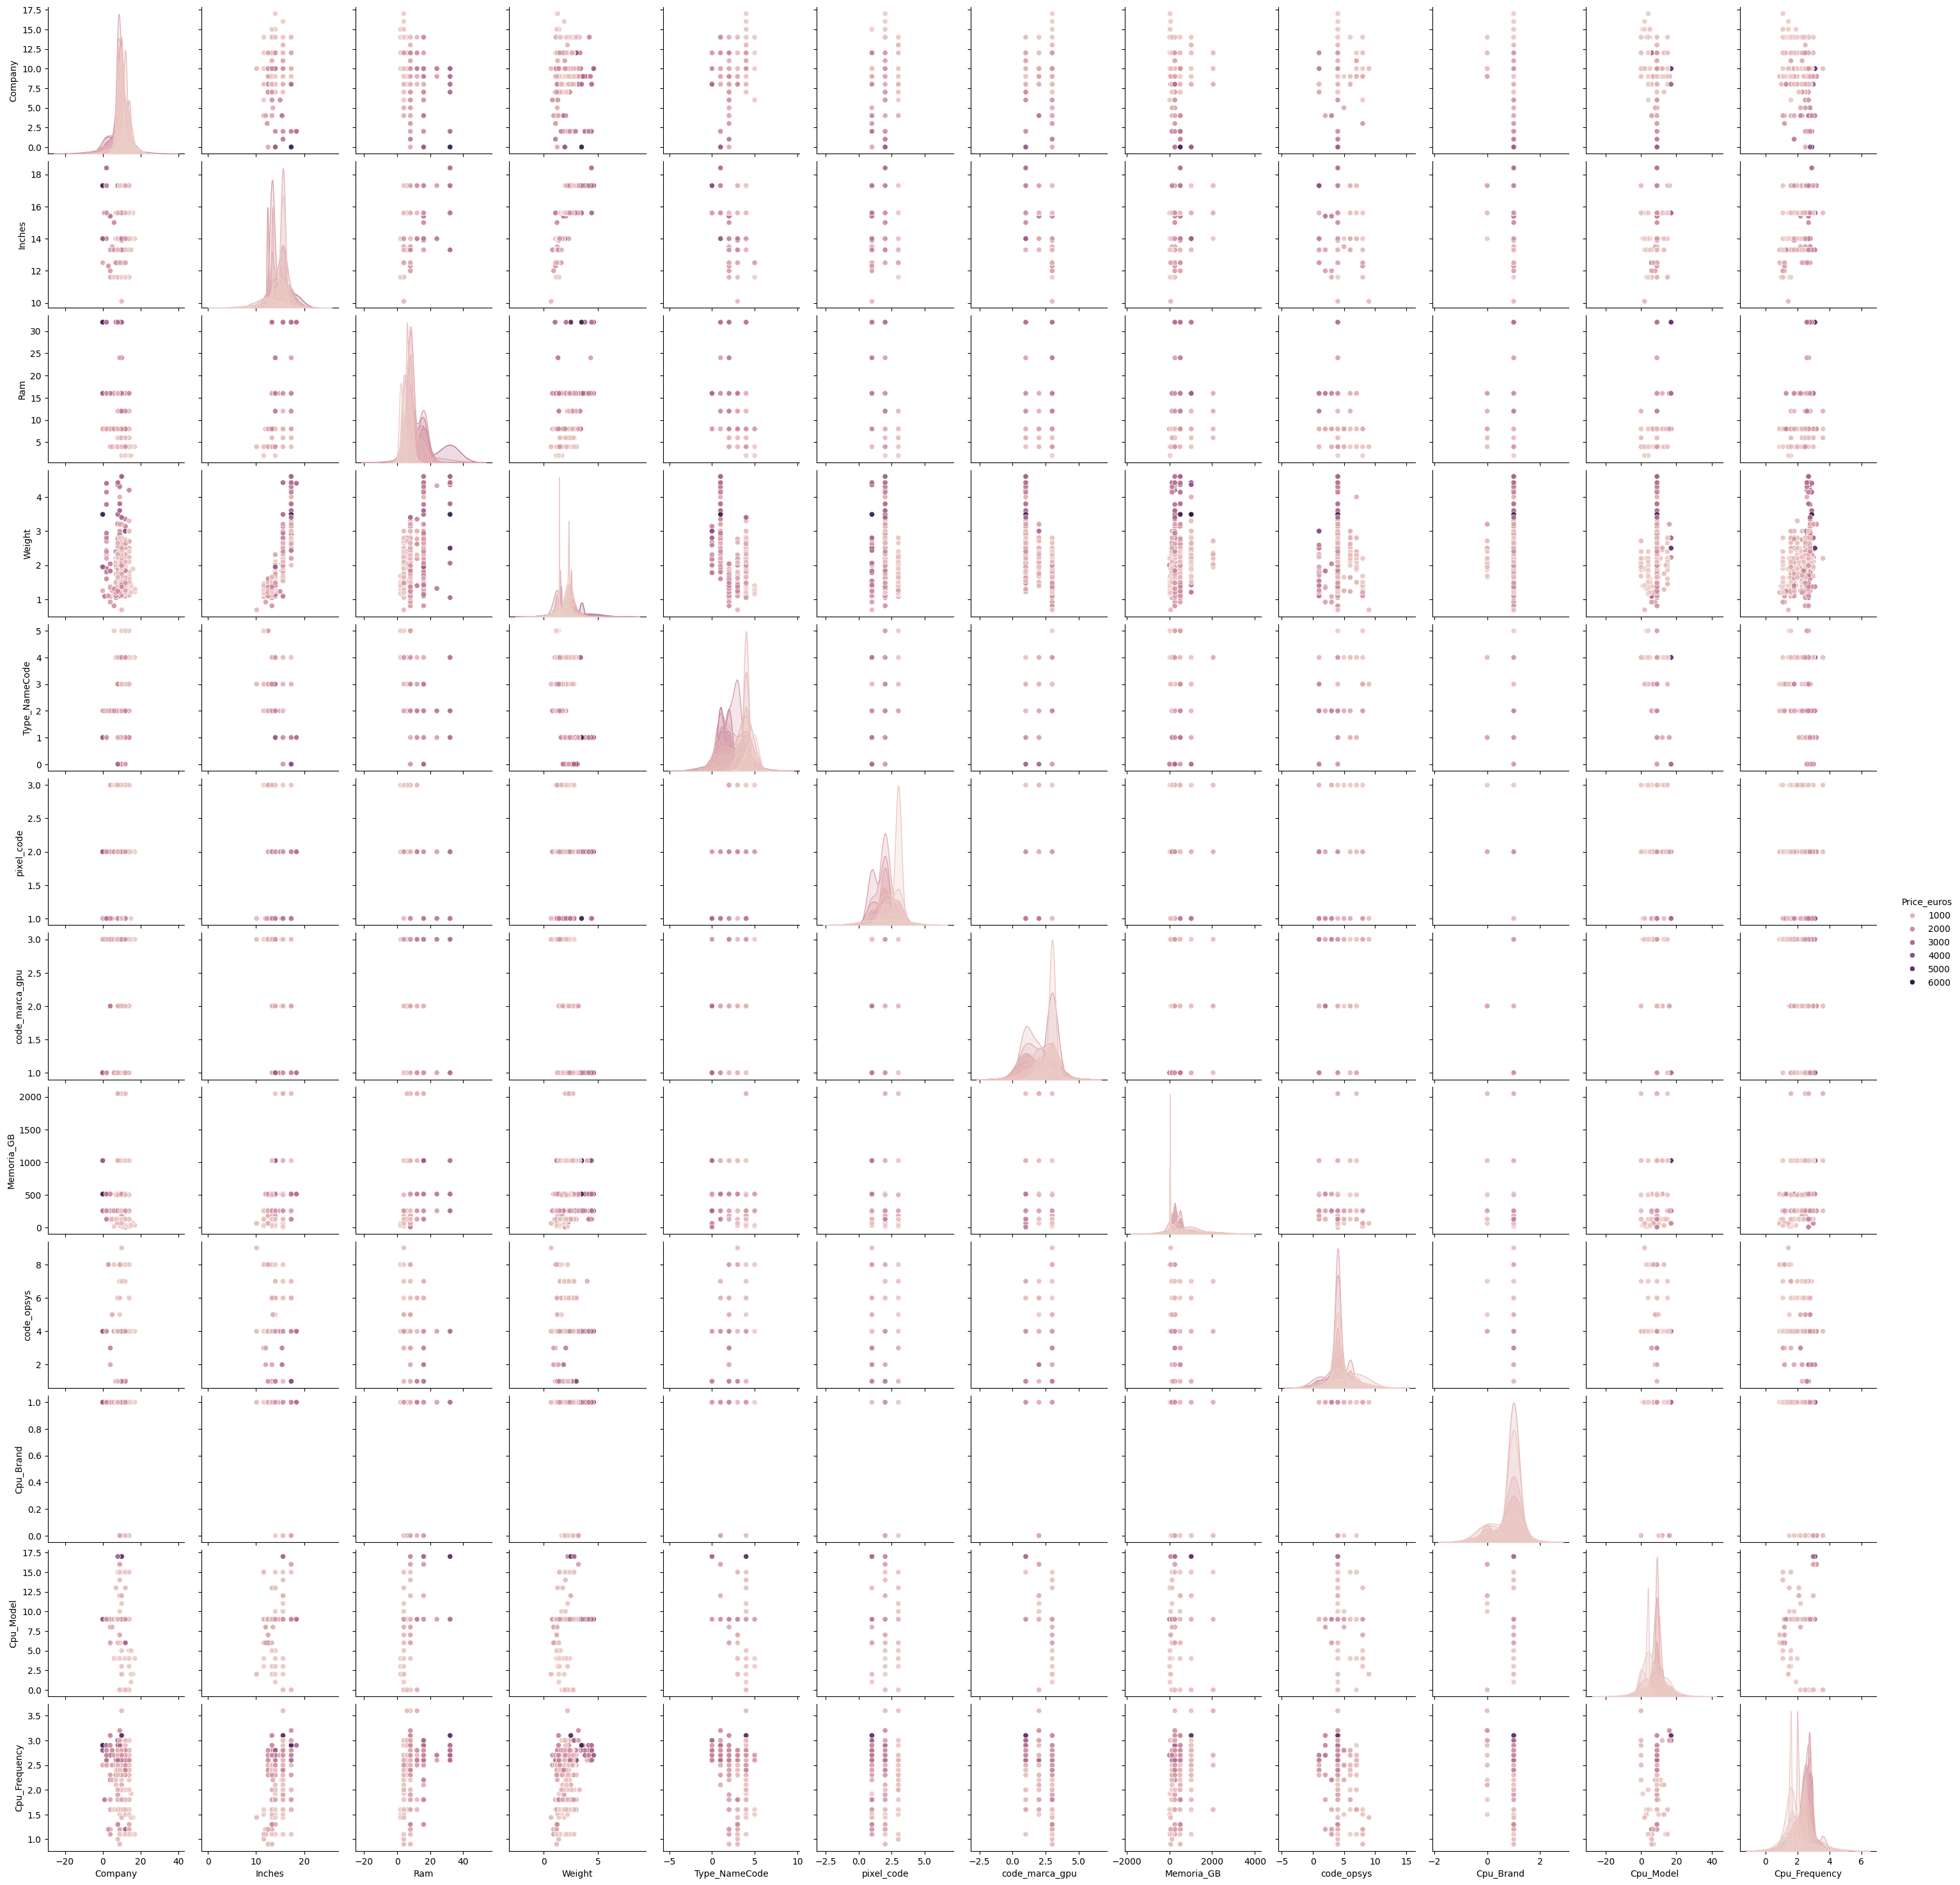

In [406]:
sns.pairplot(train_set, hue = target)

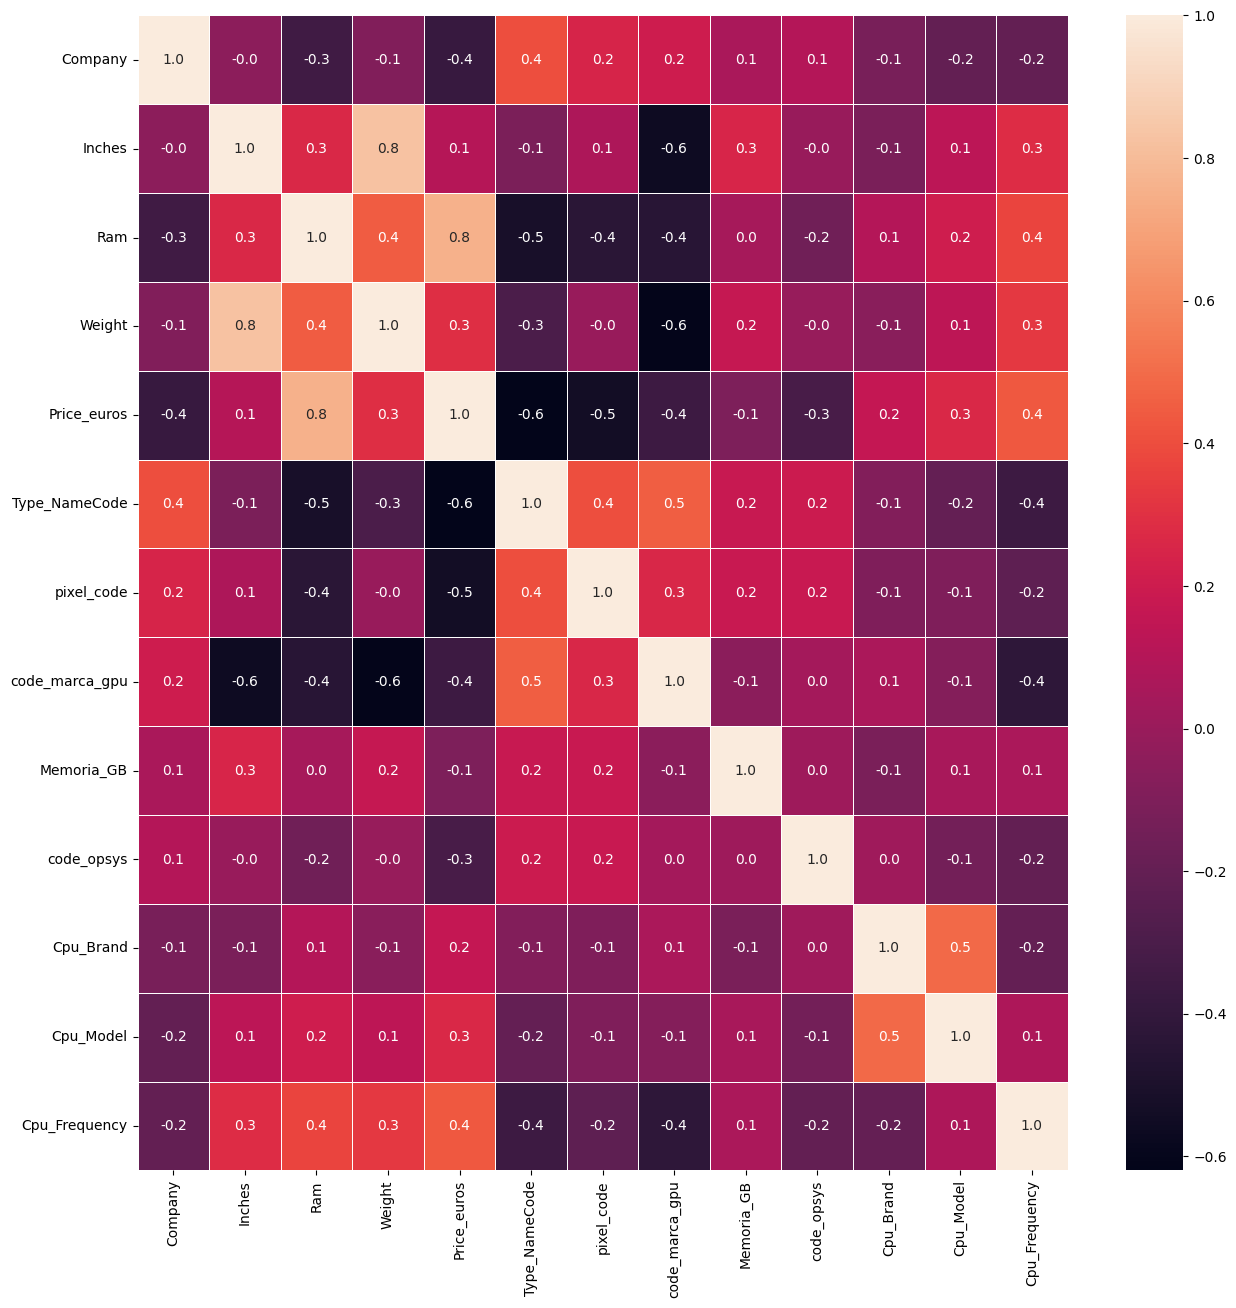

In [407]:
#correlation map
plt.figure(figsize=(15, 15))
sns.heatmap(train_set.corr(numeric_only=True), annot=True, linewidths=.5, fmt= '.1f');

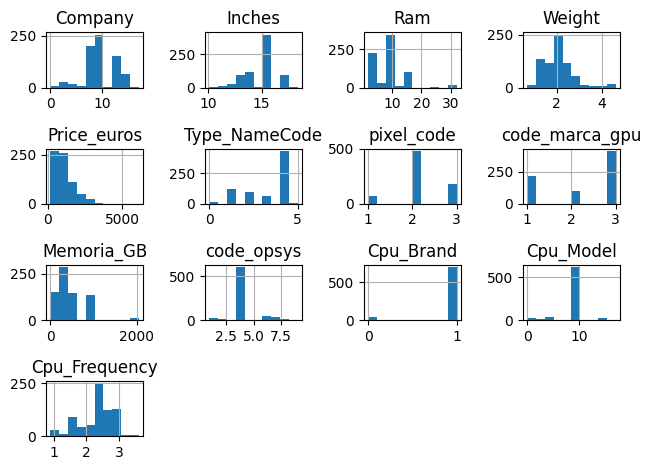

In [430]:
train_set.hist()
plt.tight_layout()

In [408]:
corr= train_set[col_num].corr()
serie_corr = np.abs(corr[target])
serie_corr.sort_values(ascending = False)

Price_euros       1.000000
Ram               0.754267
Type_NameCode     0.619602
pixel_code        0.543302
Cpu_Frequency     0.432146
Company           0.379254
code_marca_gpu    0.359009
code_opsys        0.312529
Weight            0.287637
Cpu_Model         0.263664
Cpu_Brand         0.164188
Inches            0.106196
Memoria_GB        0.104765
Name: Price_euros, dtype: float64

In [409]:
r_minimo = 0.10
features_num_sel = serie_corr[serie_corr >= r_minimo].index.to_list()

In [410]:
features_num_sel

['Company',
 'Inches',
 'Ram',
 'Weight',
 'Price_euros',
 'Type_NameCode',
 'pixel_code',
 'code_marca_gpu',
 'Memoria_GB',
 'code_opsys',
 'Cpu_Brand',
 'Cpu_Model',
 'Cpu_Frequency']

In [411]:
X_train = train_set.drop(target, axis = 1)
y_train = train_set[target]

X_test = test_set.drop(target, axis = 1)
y_test = test_set[target]

Min Max scaler

In [524]:
# Aplicar MinMaxScaler a las columnas numéricas de train_set
num_columns = col_num

scaler = MinMaxScaler()
X_train_num_scaled = scaler.fit_transform(X_train[num_columns])

# Convertir el resultado escalado de nuevo a un DataFrame
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=num_columns, index=X_train.index)

# Reemplazar las columnas numéricas originales con las escaladas en train_set
X_train_scaled = X_train.copy()
X_train_scaled[num_columns] = X_train_num_scaled

# Aplicar el mismo scaler a X_test y df_final_test
X_test_num_scaled = scaler.transform(X_test[num_columns])

# Convertir el resultado escalado de nuevo a DataFrames
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=num_columns, index=X_test.index)

# Reemplazar las columnas numéricas originales con las escaladas en X_test
X_test_scaled = X_test.copy()
X_test_scaled[num_columns] = X_test_num_scaled

# Verificar las primeras filas de los datos escalados
print(X_train_scaled.head())

      Company    Inches       Ram    Weight  Price_euros  Type_NameCode  \
25   0.529412  0.662651  0.066667  0.335038     0.036287            0.8   
84   0.823529  0.662651  0.066667  0.360614     0.046751            0.8   
10   0.529412  0.662651  0.066667  0.501279     0.022785            0.8   
342  0.470588  0.662651  0.200000  0.386189     0.079831            0.8   
890  0.705882  0.469880  0.200000  0.319693     0.036287            0.8   

     pixel_code  code_marca_gpu  Memoria_GB  code_opsys  Cpu_Brand  Cpu_Model  \
25          0.5             1.0    0.498039       0.625        1.0   0.529412   
84          1.0             0.5    0.121569       0.375        0.0   0.000000   
10          1.0             1.0    0.498039       0.375        1.0   0.882353   
342         0.5             0.5    0.498039       0.625        1.0   0.529412   
890         1.0             1.0    1.000000       0.375        1.0   0.882353   

     Cpu_Frequency  
25        0.407407  
84        0.777778  

In [528]:
X_train= X_train_scaled 
X_test = X_test_num_scaled 

In [529]:
from sklearn.feature_selection import VarianceThreshold

umbral_varianza = 0.5

var_selector = VarianceThreshold(umbral_varianza)
var_selector.fit(X_train)
print("Lista seleccionada para selector de Varianza", var_selector.get_feature_names_out())

ValueError: No feature in X meets the variance threshold 0.50000

In [413]:
selected_features_variance =  var_selector.get_feature_names_out().tolist()
print(selected_features_variance)

['Company', 'Inches', 'Ram', 'Type_NameCode', 'code_marca_gpu', 'Memoria_GB', 'code_opsys', 'Cpu_Model']


    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 


In [414]:
# Encontrar las 5 mejores características
num_feats_anova = 5
select_feature = SelectKBest(f_classif, k=num_feats_anova).fit(X_train, y_train)


In [415]:
from sklearn.feature_selection import SelectKBest, f_classif

# Verificar el tipo de datos de cada columna en X_train
non_numeric_columns = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

if non_numeric_columns:
    print("Las siguientes columnas no son numéricas y pueden causar problemas con ANOVA:")
    print(non_numeric_columns)
else:
    print("Todas las columnas son numéricas. No debería haber problemas con ANOVA.")


Todas las columnas son numéricas. No debería haber problemas con ANOVA.


In [416]:
best_features_sorted = pd.DataFrame({'Feature': X_train.columns, 'Score': select_feature.scores_}).sort_values(by='Score', ascending=False)
features_anova = select_feature.get_feature_names_out()
best_features_sorted.head()

,Feature,Score
2,Ram,4.367362
4,Type_NameCode,2.159066
5,pixel_code,1.945037
11,Cpu_Frequency,1.579122
8,code_opsys,1.523519


También pide mutual information

In [418]:
col_cat

[]

In [417]:
from sklearn.metrics import mutual_info_score
# Calcular y mostrar la información mutua para cada columna categórica respecto a la columna objetivo
for col in col_cat:
    mi_score = mutual_info_score(train_set[col], train_set[target])
    print(f"MI({col}; {target}): {mi_score}")

Resumen cuando eran categóricas, se han transformado a numéricas:
Alta Dependencia: Product (5.16) tiene la mayor dependencia con Price_euros, lo que sugiere que conocer el producto específico da mucha información sobre el precio.
Moderada Dependencia: Company (1.61) muestra una dependencia moderada con el precio.
Baja a Moderada Dependencia: pixel_code (0.70), code_marca_gpu (0.72), y Cpu_Model (0.70) tienen una dependencia baja a moderada con el precio.
Baja Dependencia: OpSys (0.67) tiene una baja dependencia.
Muy Baja Dependencia: Cpu_Brand (0.14) tiene una muy baja dependencia con el precio

    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)


In [530]:
train_set.head(3)

,Company,Inches,Ram,Weight,Price_euros,Type_NameCode,pixel_code,code_marca_gpu,Memoria_GB,code_opsys,Cpu_Brand,Cpu_Model,Cpu_Frequency
25,9,15.6,4.0,2.00,389.0,4,2,3,1024.0,6,1,9,2.0
84,14,15.6,4.0,2.10,451.0,4,3,2,256.0,4,0,0,3.0
10,9,15.6,4.0,2.65,309.0,4,3,3,1024.0,4,1,15,1.6


In [420]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, 25 to 102
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         729 non-null    int8   
 1   Inches          729 non-null    float64
 2   Ram             729 non-null    float64
 3   Weight          729 non-null    float64
 4   Price_euros     729 non-null    float64
 5   Type_NameCode   729 non-null    int8   
 6   pixel_code      729 non-null    int32  
 7   code_marca_gpu  729 non-null    int32  
 8   Memoria_GB      729 non-null    float64
 9   code_opsys      729 non-null    int32  
 10  Cpu_Brand       729 non-null    int32  
 11  Cpu_Model       729 non-null    int32  
 12  Cpu_Frequency   729 non-null    float64
dtypes: float64(6), int32(5), int8(2)
memory usage: 55.5 KB


## 4. Escoger el modelo 


3. Ver que modelo escogemos entrenar.


In [531]:
# Definir las características (features) que se usarán para el entrenamiento
features = X_train.columns.tolist()

# Verificar las características comunes entre el conjunto de entrenamiento y el conjunto de prueba
common_features = [feature for feature in features if feature in df_final_test.columns]

if len(common_features) != len(features):
    print(f"Advertencia: Las siguientes características no están en df_final_test y serán excluidas: {set(features) - set(common_features)}")

# Actualizar el conjunto de características a usar
features = common_features

# Definir los modelos de regresión
modelos = {
    "RandomForestRegressor": RandomForestRegressor(random_state=42),
    "LinearRegression": LinearRegression(),
    "LGBMRegressor": LGBMRegressor(random_state=42),
}

# Realizar validación cruzada y calcular la métrica de evaluación (mean_absolute_error) para cada modelo
resultados = {}

for nombre_modelo, modelo in modelos.items():
    mae_scores = cross_val_score(modelo, X_train[features], y_train, cv=6, scoring=make_scorer(mean_absolute_error))
    resultados[nombre_modelo] = {
        'mae': mae_scores.mean(),
    }

# Seleccionar el mejor modelo basado en la media del mean_absolute_error (mae)
mejor_modelo_mae = min(resultados, key=lambda k: resultados[k]['mae'])

print(f"El mejor modelo basado en MAE es: {mejor_modelo_mae} con un MAE medio de {resultados[mejor_modelo_mae]['mae']}")


Advertencia: Las siguientes características no están en df_final_test y serán excluidas: {'Price_euros'}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001866 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 177
[LightGBM] [Info] Number of data points in the train set: 607, number of used features: 12
[LightGBM] [Info] Start training from score 1119.833755
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

In [532]:
# Entrenar y evaluar el mejor modelo en el conjunto de prueba
mejor_modelo = modelos[mejor_modelo_mae]
mejor_modelo.fit(X_train[features], y_train)
y_pred = mejor_modelo.predict(X_test[features])
mae_test = mean_absolute_error(y_test, y_pred)

print(f"El MAE en el conjunto de prueba del mejor modelo ({mejor_modelo_mae}) es: {mae_test}")

El MAE en el conjunto de prueba del mejor modelo (RandomForestRegressor) es: 213.29533276949823


In [534]:
# Si el mejor modelo es LinearRegression, realizar búsqueda en cuadrícula
if mejor_modelo_mae == "LinearRegression":
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('lr', LinearRegression())
    ])
    param_grid_lr = {
        'lr__fit_intercept': [True, False]
    }
    lr_grid_search = GridSearchCV(pipeline, param_grid=param_grid_lr, cv=5, scoring="neg_mean_absolute_error")
    lr_grid_search.fit(X_train[features], y_train)
    best_params_lr = lr_grid_search.best_params_
    print("Mejores hiperparámetros para LinearRegression:", best_params_lr)
    best_lr_model = lr_grid_search.best_estimator_
    best_lr_model.fit(X_train[features], y_train)
    y_pred_lr = best_lr_model.predict(X_test[features])
    mae_test_lr = mean_absolute_error(y_test, y_pred_lr)
    print(f"El MAE en el conjunto de prueba del mejor modelo LinearRegression es: {mae_test_lr}")
    mejor_modelo = best_lr_model

Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


In [536]:
# Definir los parámetros de búsqueda en cuadrícula
param_grids = {
    "RandomForestRegressor": {
        'n_estimators': [100, 200],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [10, 20, None]
    },
    "LinearRegression": {
        'lr__fit_intercept': [True, False]
    },
    "LGBMRegressor": {
        'num_leaves': [31, 50],
        'n_estimators': [100, 200]
    }
}

# Ajustar los hiperparámetros del mejor modelo si tiene parámetros ajustables
mejor_modelo = modelos[mejor_modelo_mae]
if mejor_modelo_mae in param_grids:
    print(f"Ajustando hiperparámetros para {mejor_modelo_mae}...")
    if mejor_modelo_mae == "LinearRegression":
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('lr', LinearRegression())
        ])
        grid_search = GridSearchCV(pipeline, param_grids[mejor_modelo_mae], cv=5, scoring="neg_mean_absolute_error")
    else:
        grid_search = GridSearchCV(mejor_modelo, param_grids[mejor_modelo_mae], cv=5, scoring="neg_mean_absolute_error")
    
    grid_search.fit(X_train[features], y_train)
    mejor_modelo = grid_search.best_estimator_
    print(f"Mejores hiperparámetros para {mejor_modelo_mae}: {grid_search.best_params_}")

Ajustando hiperparámetros para RandomForestRegressor...
Mejores hiperparámetros para RandomForestRegressor: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}


In [537]:
# Entrenar y evaluar el mejor modelo con los mejores hiperparámetros en el conjunto de prueba
mejor_modelo.fit(X_train[features], y_train)
y_pred = mejor_modelo.predict(X_test[features])
mae_test = mean_absolute_error(y_test, y_pred)
print(f"El MAE en el conjunto de prueba del mejor modelo ({mejor_modelo_mae}) con los mejores hiperparámetros es: {mae_test}")

El MAE en el conjunto de prueba del mejor modelo (RandomForestRegressor) con los mejores hiperparámetros es: 192.18057136943207


## 5. Predicción y submission file

In [538]:
# Realizar predicciones con el modelo final en el conjunto de prueba definitivo
X_test_final = df_final_test[features]
y_pred_final = mejor_modelo.predict(X_test_final)

# Preparar el archivo de submission
submission = pd.DataFrame({
    'ID': df_final_test['id'],
    'Price_euros': y_pred_final
})

In [540]:

# Asegurarse de que el formato sea correcto y guardar
submission.to_csv('submission1.csv', index=False)

print("Predicciones guardadas correctamente en 'submission1.csv'.")

Predicciones guardadas correctamente en 'submission1.csv'.
